In [ ]:
# packages
import sys
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", pd.errors.SettingWithCopyWarning)

In [ ]:
# link to self-written packages
sys.path.append("/g/data/gb02/cj0591/hk25-AusCyclones") # change to your directory
from utils.plotting import plot_track, calcu_track_den, lon180to360, plot_den

In [ ]:
# tropical cyclone
input_tc_csv_dir = '/g/data/gb02/cj0591/hk25-AusCyclones/data/stitchNode_TC_output_era5_1980-2020.csv'
column_names = ["track_id", "year", "month", "day", "hour", "i", "j", "lon", "lat", "msl", "wind", "zs"]
dftc = pd.read_csv(input_tc_csv_dir, names=column_names, skiprows=[0],low_memory=False)
dftc['time'] = pd.to_datetime(dftc[['year', 'month', 'day', 'hour']])

**Visualization 1**  
`plot_track`(df, track_color, fig_title)  
plot tracks  

Parameters:
- **df** - cyclone tracks dataframe (pandas dataframe)
- **track_color** - track color (string)
- **fig_title** - figure title (string)

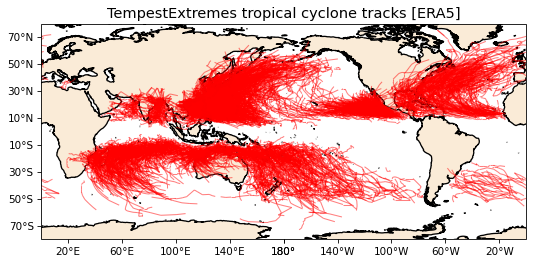

In [27]:
fig = plot_track(dftc, 'red', 'TempestExtremes tropical cyclone tracks [ERA5]')

**Visualization 2**  
`calcu_track_den`(min_lon, max_lon, min_lat, min_lat, max_lat, delta, df_track, storm_id_field, grid_id_field, lonname, latname)  
calculate track density from cyclone tracks  

Parameters:
- **min_lon** - minimum longitude
- **max_lon** - maximum longitude
- **min_lat** - minimum latitude
- **max_lat** - maximum latitude
- **delta** - horizontal grid spacing
- **df_track** - cyclone tracks dataframe (pandas dataframe)
- **storm_id_field** - cyclone track ID number (string)
- **grid_id_field** - "grid_id_field" default
- **lonname** - name of longitude of cyclone track (string)
- **latname** - name of latitude of cyclone track (string)

In [ ]:
dftc['lon'] = [lon180to360(lon) for lon in dftc['lon']]
dstc = calcu_track_den(0, 360, -80, 80, 1, dftc, 'track_id', 'gridid', 'lon', 'lat')

**Visualization 3**  
`plot_den`(dataArray, minlon, maxlon, minlat, maxlat, count_range, sigma, mycmap, title)  
plot track density

Parameters:
- **dataArray** - 2-D density array (xrarry data array)
- **min_lon** - minimum longitude
- **max_lon** - maximum longitude
- **min_lat** - minimum latitude
- **max_lat** - maximum latitude
- **count_range** - colorbar levels (numpy array)
- **sigma** - degree of smooth (1~5)
- **mycmap** - name of longitude of cyclone track (string)
- **title** - figure title (string)

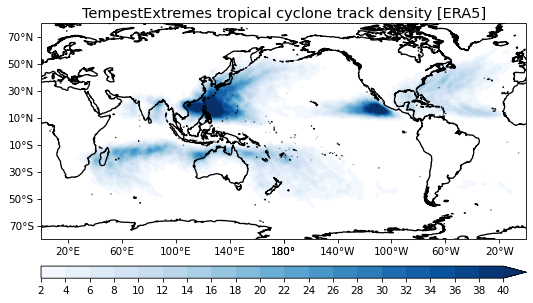

In [ ]:
fig = plot_den(dstc['number'], 0, 360, -80, 80, np.arange(2, 42, 2), 1, 'Blues', 'TempestExtremes tropical cyclone track density [ERA5]')